## 6.5 Machine Learning Part 2`

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating'

In [5]:
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Chocolate_cleaned.csv'))

In [6]:
df.shape

(1795, 10)

In [8]:
df.head()

,Unnamed: 0,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Other,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Other,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Other,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Other,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Other,Peru


In [9]:
df.columns

Index(['Unnamed: 0', 'Company (if known)', 'Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

In [11]:
# dropping columns (remove all categorial columns to perform K-mean algo)
df.drop(columns = ["Unnamed: 0","Company (if known)","Bar Origin","REF","Company Location","Bean Type","Bean Origin"], axis=1, inplace = True)

In [12]:
df.columns

Index(['Review Date', 'Cocoa Percent', 'Rating'], dtype='object')

In [13]:
df.head()

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


## 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/priyankamittal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priyankamittal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priyankamittal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priyankamittal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

[-15789.176708857936,
 -4532.831320982334,
 -2165.245653575306,
 -1449.6632358027846,
 -1007.7907329354011,
 -816.0056109053164,
 -683.2501895536199,
 -588.5413666455831,
 -521.4168283072199]

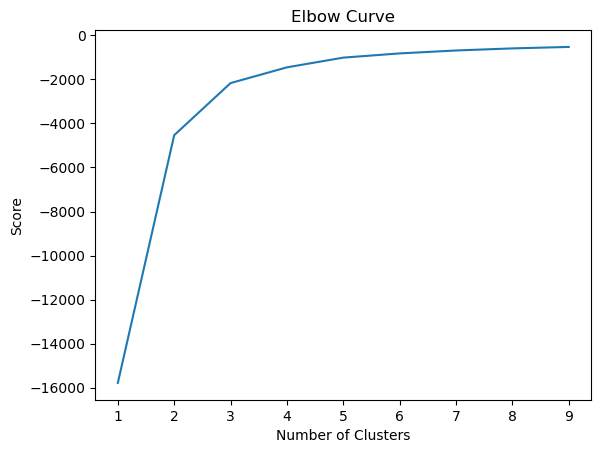

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

After the 3rd cluster, the line starts to straighten out so the optimal count for clusters is three.

### 3. k-means clustering


In [18]:
# Create the k-means object.

# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init="auto")

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [20]:
df['clusters'] = kmeans.fit_predict(df)

In [21]:
df.head()

,Review Date,Cocoa Percent,Rating,clusters
0,2016,0.63,3.75,0
1,2015,0.70,2.75,0
2,2015,0.70,3.00,0
3,2015,0.70,3.50,0
4,2015,0.70,3.50,0


In [23]:
df['clusters'].value_counts()

0    775
1    655
2    365
Name: clusters, dtype: int64

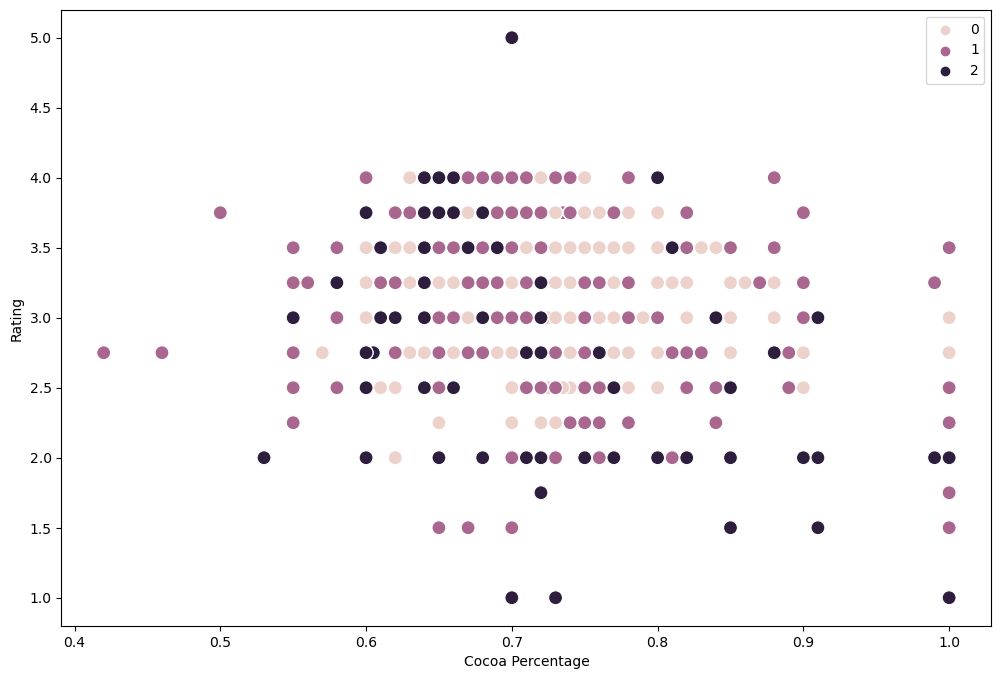

In [25]:
# Plot the clusters for the "Cocoa_percentage" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percentage') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

- The dark purple cluster mostly represents the chocolate bars with lower than average cocoa percent and ranges from 2 - 4 in ratings.
- The purple cluster mostly represents the bars with higher than average cocoa percent and also ranges from 2 - 4 in ratings.
- As for the pink cluster, it contains bars with a variety of cocoa percentages and ratings.

Overall, I would say the clusters do not make sense since the data points in the clusters are not consistent.



In [26]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df.groupby('cluster').agg({'Cocoa Percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa Percent           Rating       
                     mean median      mean median
cluster                                          
dark purple      0.714644    0.7  3.082192   3.00
pink             0.720032    0.7  3.224516   3.25
purple           0.714679    0.7  3.198092   3.25

- Looking at the statistics, I can see that the mean and median are similar for the clusters of "Cocoa_percentage" and "Rating".
- These results does not provide much insight and therefore I need to explore the data further.